In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

%matplotlib inline

In [2]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n, weight = 'weight') for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=25)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=25)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    print(bin_edges)
    print(density)
    
    fig = plt.figure(figsize=(16,16))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [3]:
df = pd.read_csv('../data/taxon-importer.csv', header=0)
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

taxons = {}
purpose = {}
       
        
for index, row in df.iterrows():
    details = {"Appendix": row['Appendix'], "Class": row['Class'], "Order": row['Order'], "Family": row['Family'], "Genus": row['Genus']}
    
    if(row['Purpose'] == "B"):
        purposeCode = "Breeding"
    if(row['Purpose'] == "E"):
        purposeCode = "Educational"
    if(row['Purpose'] == "G"):
        purposeCode = "Garden"
    if(row['Purpose'] == "H"):
        purposeCode = "Hunting"
    if(row['Purpose'] == "L"):
        purposeCode = "Law"
    if(row['Purpose'] == "M"):
        purposeCode = "Medical"
    if(row['Purpose'] == "R"):
        purposeCode = "Reintroduction to wild"
    if(row['Purpose'] == "P"):
        purposeCode = "Personal"
    if(row['Purpose'] == "Q"):
        purposeCode = "Circus"
    if(row['Purpose'] == "S"):
        purposeCode = "Scientific"
    if(row['Purpose'] == "T"):
        purposeCode = "Commercial"
    if(row['Purpose'] == "Z"):
        purposeCode = "Zoo"
    if(row['Purpose'] == "Unspecified"):
        purposeCode = "Unspecified"
        
    attributes = {"Details": details}

    taxons.update({row['Taxon']: row['Taxon']})
    if G.has_node(row['Taxon']):
        if purposeCode not in G.nodes[row['Taxon']]['purpose']:  
            G.nodes[row['Taxon']]['purpose'].append(purposeCode)
    else:
        purpose = [purposeCode]
        G.add_node(row['Taxon'], **details, purpose = [purposeCode])

df2 = df.drop_duplicates(['Taxon', 'Importer'])
for i, group in df2.groupby(['Importer'])['Taxon']: #https://stackoverflow.com/questions/35089255/pandas-reshape-dataframe-to-edge-list-according-to-column-values
    # generate all combinations without replacement 
    # from the group of similar column pairs
    for u, v in itertools.combinations(group, 2):        
        if(G.has_edge(u,v)):
            G[u][v]['weight'] += 1
        else:
            G.add_edge(u, v, weight = 1, countries = [i])

nx.write_gml(G, "taxon-taxon-importer.gml")


Number of nodes:  1423
Number of edges:  425053

Weighted average degree: 1101.1047083626142
Minimum degree:  3
Maximum degree:  6251

[3.00000000e+00 4.54017331e+00 6.87105790e+00 1.03985979e+01
 1.57371456e+01 2.38164561e+01 3.60436128e+01 5.45480830e+01
 8.25525836e+01 1.24934346e+02 1.89074527e+02 2.86143708e+02
 4.33047342e+02 6.55369994e+02 9.91831119e+02 1.50102839e+03
 2.27164302e+03 3.43788433e+03 5.20286357e+03 7.87396744e+03
 1.19163923e+04 1.80341621e+04 2.72927405e+04 4.13045906e+04
 6.25100000e+04]
[2.73764264e-03 6.02981968e-04 1.59372410e-03 3.94905544e-04
 6.95842236e-04 8.04632662e-04 7.59536136e-05 5.26970814e-04
 4.31111333e-04 1.16137047e-03 1.21625047e-03 3.77911103e-04
 9.19823229e-04 3.36268420e-04 2.67738459e-04 1.26757205e-04
 5.96543161e-05 3.58342244e-05 1.57853993e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


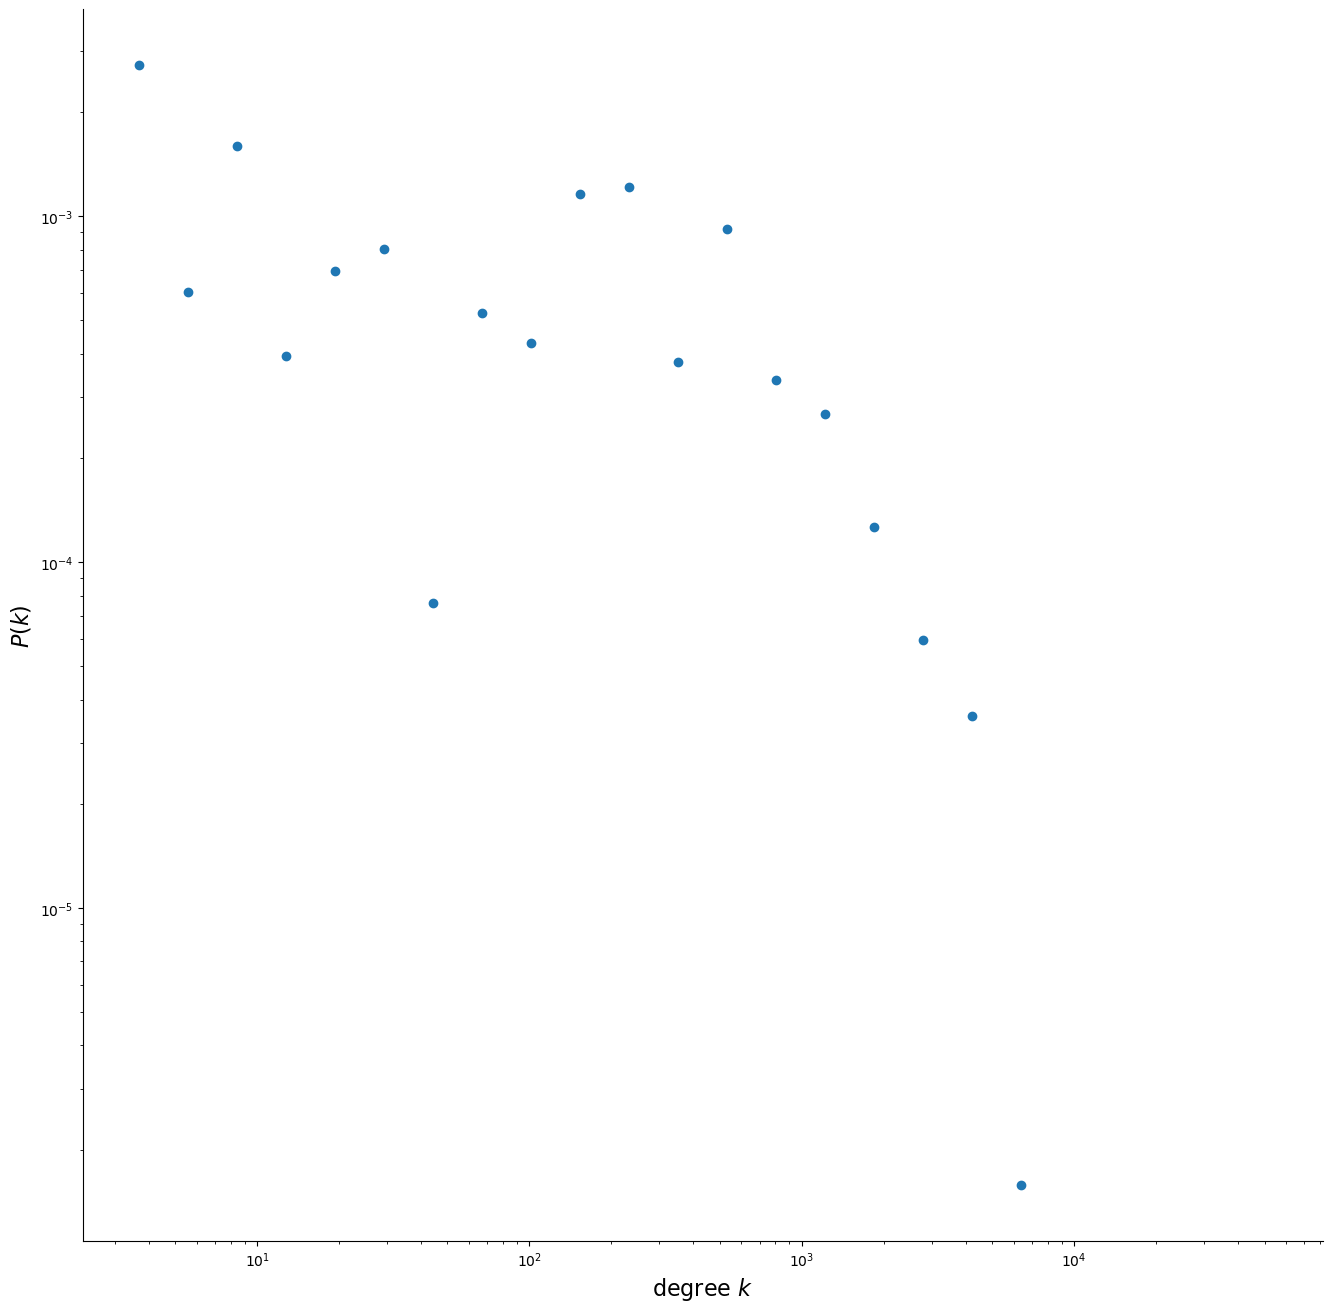

In [4]:
degrees = [G.degree(n, weight = 'weight') for n in G.nodes()]
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print()
print("Weighted average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))
print()
plot_degree_dist(G)

In [5]:
print("Unweighted average Clustering Coefficient: ", np.mean(list(nx.clustering(G).values())))

print("Weighted average clustering coefficient: ", nx.average_clustering(G, weight='weight'))

print("Number of connected components: ", nx.number_connected_components(G))

print("Average shortest path length: ", nx.average_shortest_path_length(G))


Unweighted average Clustering Coefficient:  0.859252703041915
Weighted average clustering coefficient:  0.03330728185845359
Number of connected components:  1
Average shortest path length:  1.5859928263123508
